# Solution to the Initial Value Problem:

\begin{equation}
\epsilon\frac{\partial \theta}{\partial t} + \cos{(y)}\frac{\partial\theta}{\partial x} = \frac{1}{Pe}\frac{\partial^2\theta}{\partial x^2} + \epsilon\frac{\partial^2\theta}{\partial y^2}
\end{equation}

in the domain $0<y<2\pi$, $-\alpha \pi < x < \alpha \pi$, $t>0$ with $\alpha>>1$

with initial condition

\begin{equation}
\theta(x, y, 0) = \theta_{0}\exp{(-x^2/\sigma^2)}
\end{equation}


### We only calculate the average solution below



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
from mathieu_functions import mathieu_functions as mfs
from mathieu_functions import A_coefficients

In [3]:
# =================================
# Important parameters to define
# =================================
L = np.pi # Half of channel width (y-direction)
N = 200  # length of k-array
alpha = 8  # length of channel periodic in x. I have used alpha=10 before, but for the gaussian initial condition a value of 2 is better.
Nx = 2500  # length of x-array
sigma=0.5  # changes width of gaussian

eps = 0.05  # ta / td << 1 for weakly diffusive processes.
Pe = 1/eps  # Peclet number  (I have been considering it as infinite. but a finite value should affect the x-decay of solution)

x = np.linspace(-alpha * L, alpha * L, Nx)
y = np.linspace(0, 2 * L, Nx//5)
X, Y = np.meshgrid(x, y)

K = np.arange(0, N / alpha, 1 / alpha)  # wavenumber array.
K_test = np.linspace(0, N/alpha, 200)
Q = 2 * (1j) * K / eps  # Canonical Mathieu parameter
Q_test = (1j) * K_test / (8*eps)
qf = Q[-1].imag  # Largest value of Mathieu's parameter. SHOULD NOT exceed 62, for now...

M = 75  # matrix size. This value works well for values of q up to 62i.
Nq = N

t = np.linspace(0, 1.25, 250)
colors = ['#0000cc', '#990000', 'darkgreen',
          'indigo', '#009999', 'orange',
          '#ff66ff', '#b266ff', '#33ff99']
T0_levs = np.linspace(0, 1, 1000)

In [4]:
print('Last element of K, q, size(q)')
K[-1], Q[-1], len(Q)

Last element of K, q, size(q)


(24.875, 995j, 200)

## Calculate Mathieu Eigenfunctions and Eigenvals

We don't need to calculate the Eigenfunctions, as we are only interested in calculated the averaged (exact) solution. We only
need the eigenvalues $a_{2n}$ and the Fourier Coefficients $A_{2r}^{(2n)}$.

In [5]:
A_vals = A_coefficients(Q, M, 'even', 'one')  # even function with period one-pi

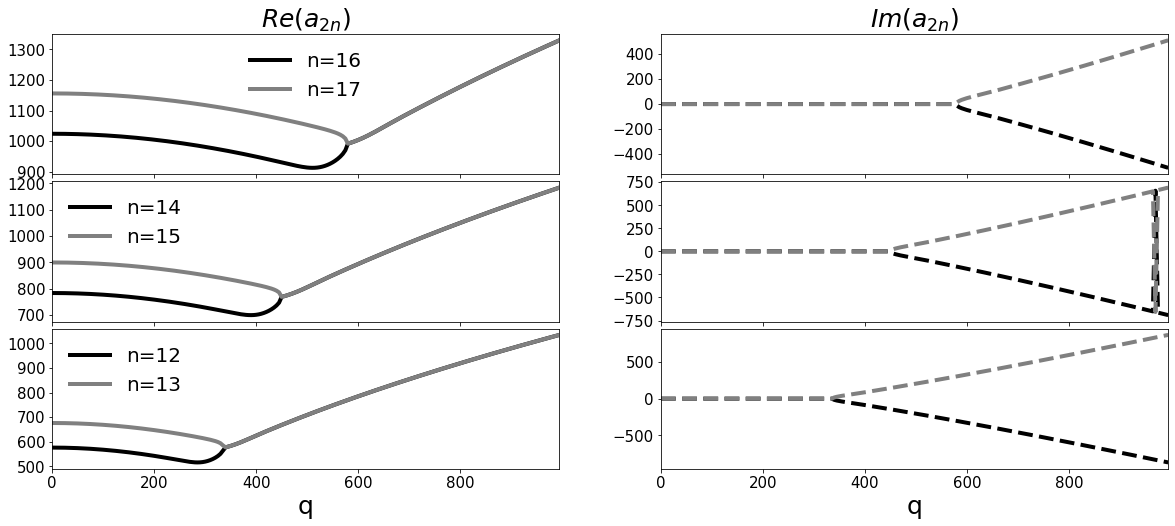

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(3,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[4])
plt.plot(Q.imag, A_vals['a24'].real,'k', lw=4, label='n=12')
plt.plot(Q.imag, A_vals['a26'].real, '#808080', lw=4, label='n=13')
plt.xlim(Q[0].imag, Q[-1].imag)
# plt.ylim(0, 10)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[5])
plt.plot(Q.imag, A_vals['a24'].imag, 'k', lw=4, ls='--', label='n=12')
plt.plot(Q.imag, A_vals['a26'].imag, '#808080', lw=4, ls='--', label='n=13')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a28'].real, 'k', lw=4, label='n=14')
plt.plot(Q.imag, A_vals['a30'].real, '#808080', lw=4, label='n=15')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a28'].imag, 'k', lw=4, ls='--', label='n=14')
plt.plot(Q.imag, A_vals['a30'].imag, '#808080',lw=4, ls='--', label='n=15')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
ax5 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a32'].real, 'k', lw=4, label='n=16')
plt.plot(Q.imag, A_vals['a34'].real, '#808080', lw=4, label='n=17')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax6 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a32'].imag, 'k', lw=4, ls='--', label='n=16')
plt.plot(Q.imag, A_vals['a34'].imag, '#808080', lw=4, ls='--', label='n=17')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

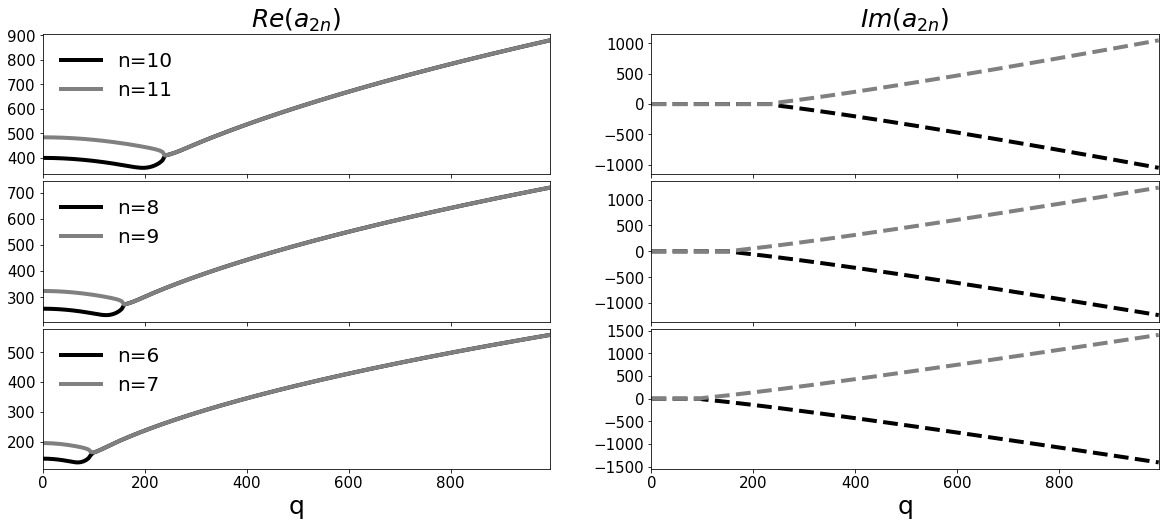

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(3,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[4])
plt.plot(Q.imag, A_vals['a12'].real,'k', lw=4, label='n=6')
plt.plot(Q.imag, A_vals['a14'].real, '#808080', lw=4, label='n=7')
plt.xlim(Q[0].imag, Q[-1].imag)
# plt.ylim(0, 10)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[5])
plt.plot(Q.imag, A_vals['a12'].imag, 'k', lw=4, ls='--', label='n=6')
plt.plot(Q.imag, A_vals['a14'].imag, '#808080', lw=4, ls='--', label='n=7')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a16'].real, 'k', lw=4, label='n=8')
plt.plot(Q.imag, A_vals['a18'].real, '#808080', lw=4, label='n=9')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a16'].imag, 'k', lw=4, ls='--', label='n=8')
plt.plot(Q.imag, A_vals['a18'].imag, '#808080',lw=4, ls='--', label='n=9')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
ax5 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a20'].real, 'k', lw=4, label='n=10')
plt.plot(Q.imag, A_vals['a22'].real, '#808080', lw=4, label='n=11')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax6 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a20'].imag, 'k', lw=4, ls='--', label='n=10')
plt.plot(Q.imag, A_vals['a22'].imag, '#808080', lw=4, ls='--', label='n=11')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

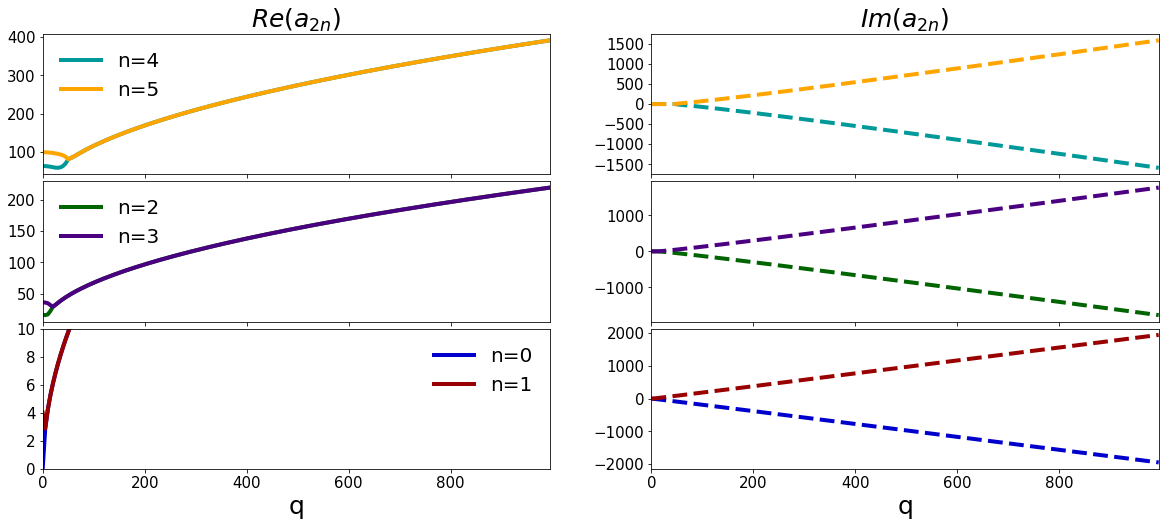

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(3,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[4])
plt.plot(Q.imag, A_vals['a0'].real, color=colors[0], lw=4, label='n=0')
plt.plot(Q.imag, A_vals['a2'].real, color=colors[1], lw=4, label='n=1')
plt.xlim(0, qf)
plt.ylim(0, 10)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[5])
plt.plot(Q.imag, A_vals['a0'].imag, color=colors[0], lw=4, ls='--', label='n=0')
plt.plot(Q.imag, A_vals['a2'].imag, color=colors[1], lw=4, ls='--', label='n=1')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a4'].real, color=colors[2], lw=4, label='n=2')
plt.plot(Q.imag, A_vals['a6'].real, color=colors[3], lw=4, label='n=3')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a4'].imag, color=colors[2], lw=4, ls='--', label='n=2')
plt.plot(Q.imag, A_vals['a6'].imag, color=colors[3], lw=4, ls='--', label='n=3')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
ax5 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a8'].real, color=colors[4], lw=4, label='n=4')
plt.plot(Q.imag, A_vals['a10'].real, color=colors[5], lw=4, label='n=5')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax6 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a8'].imag, color=colors[4], lw=4, ls='--', label='n=4')
plt.plot(Q.imag, A_vals['a10'].imag, color=colors[5], lw=4, ls='--', label='n=5')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

## Create Ordered Lists

In [9]:
OM = []
AA = []
for k in range(M // 2):
    OM.append(0.25*np.copy(A_vals['a' + str(2 * k)]))
    AA.append(np.copy(A_vals['A' + str(2 * k)][:, 0]))


COS = [np.exp(K[i] * x*(1j)) for i in range(N)]

## Gaussian Initial condition

In [10]:
G = np.exp(-(x/sigma)**2)

In [11]:
fac = np.sqrt(np.pi)*sigma/(2*L)
arg = ((2 * L) / (np.pi*sigma))**2
cn = []
for n in range(N):
    cn.append(fac * np.exp(-K[n]**2/(arg**2)))

## Initial condition (Mathieu Functions Expansion) 

Mathieu Functions are contained in a list ```CEE```, with the zeroth Fourier Coefficients that determine these Mathieu Functions contained in another list: ```AA```.


In [12]:
SUM = [2 * (AA[r][0]**2) for r in range(len(AA))]
SUM = np.sum(np.array(SUM), axis=0)
coeff = [SUM * cn[0] * COS[0]]
for k in range(1, N):
    SUM = [2 * (AA[r][k]**2) for r in range(len(AA))]
    SUM = np.sum(np.array(SUM), axis=0)  # r-sum
    coeff.append(cn[k] * SUM * COS[k])

In [13]:
T0 = ((0.25)*sigma**2)*np.sum(coeff, axis=0).real # k-sum

/Users/Mikejmnez/anaconda3/envs/Mathieu_Functions/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


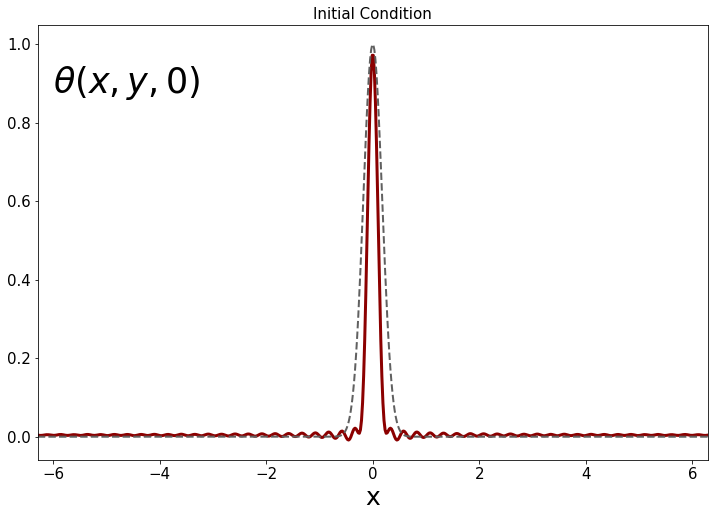

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(x, T0, 'darkred', lw=3)
plt.plot(x, np.exp(-x**2/(sigma/2)**2), color='#606060', ls='--', lw=2)
plt.xlim(-2*L, 2*L)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('x', fontsize=25)
# plt.ylabel(r'$\theta(x, y, 0)$', fontsize=25, rotation=0, labelpad=40)
ax.annotate(r'$\theta(x, y, 0)$', xy=(-6, 0.875), xytext=(-6, 0.875), fontsize=35)
plt.title('Initial Condition', fontsize=15)
plt.show()

## Now, add the rest of the temporal evolution

In [15]:
T0 = T0[np.newaxis, :]

In [16]:
for i in range(1, len(t)):
    SUM = [2 * (AA[r][0]**2) * np.exp(-OM[r][0]*t[i]) for r in range(len(AA))]
    SUM = np.sum(np.array(SUM), axis=0)
    coeff = [SUM * cn[0] * COS[0]]
    for k in range(1, N):
        SUM = [2 * (AA[r][k]**2) * np.exp(-OM[r][k]*t[i]) for r in range(len(AA))]
        SUM = np.sum(np.array(SUM), axis=0)  # r-sum
        coeff.append(cn[k] * SUM * COS[k])
    t0 = (0.25 * sigma**2)*np.sum(coeff, axis=0).real # k-sum
    t0 = t0[np.newaxis, :]
    T0 = np.append(T0, t0, axis=0)

/Users/Mikejmnez/anaconda3/envs/Mathieu_Functions/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Hovmoeller plot of (cross-channel) mean solution to the Advection Diffusion Equation

In [17]:
T, Xt = np.meshgrid(x, t)

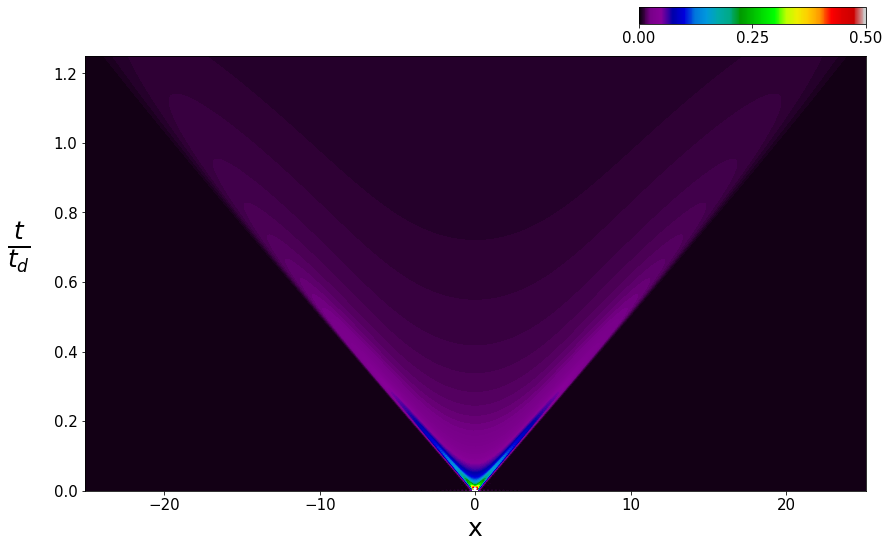

In [18]:
cmap='nipy_spectral'
fig, ax = plt.subplots(figsize=(14, 8))
cf=plt.contourf(T, Xt, T0,  levels=np.linspace(0, 0.5, 1000), cmap=cmap)
plt.xticks(size=15)
plt.yticks(size=15)
# plt.ylim(0, .2)
plt.xlabel('x', fontsize=25)
plt.xlim(-alpha * L, alpha * L)
plt.ylabel(r'$\frac{t}{t_{d}}$', fontsize=35, rotation=0, labelpad = 35)
cbaxes = fig.add_axes([0.675, 0.935, 0.225, 0.03])
clb1 = plt.colorbar(cf,cax=cbaxes,ticks=[0, 0.25, 0.5],orientation='horizontal')
clb1.ax.tick_params(labelsize=15)
plt.show()